In [ ]:
run(`java -jar RandomClusteringNetwork.jar`)

In [1]:
push!(LOAD_PATH, pwd())
using PyPlot
using RandomClusteringGraph, Distributions, LightGraphs, GraphCreation

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [34]:
mean(Gamma(2.0,10))

20.0

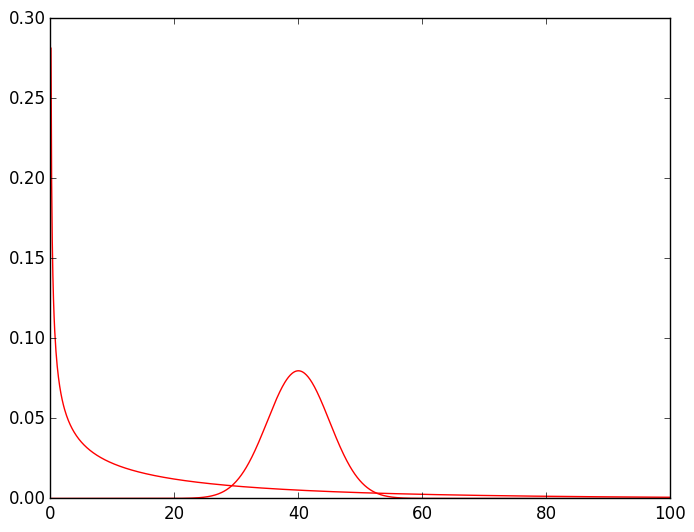

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32408f5d0>

In [36]:
x = 0:0.1:100
d = Gamma(0.5,K)
d2 = Normal(K,5)
plot(x,pdf(d,x),"r")
plot(x,pdf(d2,x),"r")

In [50]:
K = 10
N = 1000
C = 0.8

g = random_clustering_graph(Gamma(1.0,K),N,C) 
k = 2*ne(g)/nv(g)
c = mean(local_clustering_coefficient(g))
println("k: $k, c: $c")

Degree_changed 29
Degree_changed 15
Degree_changed 2
Degree_changed 42
Degree_changed 36
Degree_changed 34
Degree_changed 31
Degree_changed 31
Degree_changed 30
Degree_changed 29
Degree_changed 29
Degree_changed 26
Degree_changed 24
Degree_changed 21
Degree_changed 43
Degree_changed 2
Degree_changed 1
Degree_changed 1
k: 10.366285119667014, c: 0.524300576646546


## Clustering in Watts Strogatz random graphs

Every ``random'' ($p=1$) edge produces a triangle with probablility $c1 = K/N$

Every fixed edge ($p = 0$) produces a triangle with probability $c0 = \frac{3*(K-2)}{4*(K-1)}$

Every pristine triangle remains if all three of its edges remain intact, which happens with probability $(1-p)^3$.

Thus, we have
$$C = c1 + (c0 - c1) (1 - p)^3$$
or
$$p = 1 - \left(\frac{C - c1}{c0 - c1}\right)^{1/3}$$

Every edge that is randomly rewired causes

In [238]:

function watts_strogatz_get_clustering(N,K,beta)
    c1,c0 = watts_strogatz_clustering_limits(N,K)
    return c1 + (c0-c1)*(1-beta)^3
end

function watts_strogatz_get_beta(N,K,C)
    c1,c0 = watts_strogatz_clustering_limits(N,K)
    beta = 1 - ((C - c1)/(c0 - c1))^(1.0/3)
    return beta
end

function watts_strogatz_clustering_limits(N,K)
    c1 = K/N
    c0 = 3*(K-2)/(4*(K-1))
    return c1,c0
end

function watts_strogatz_with_custering(N,K,C)
    c1,c0 = watts_strogatz_clustering_limits(N,K)
    C = clamp(C,c1,c0)
    beta = watts_strogatz_get_beta(N,K,C)
    return watts_strogatz(N,K,beta)
end

watts_strogatz_with_custering (generic function with 1 method)

In [241]:
clamp(11,0,20)

11

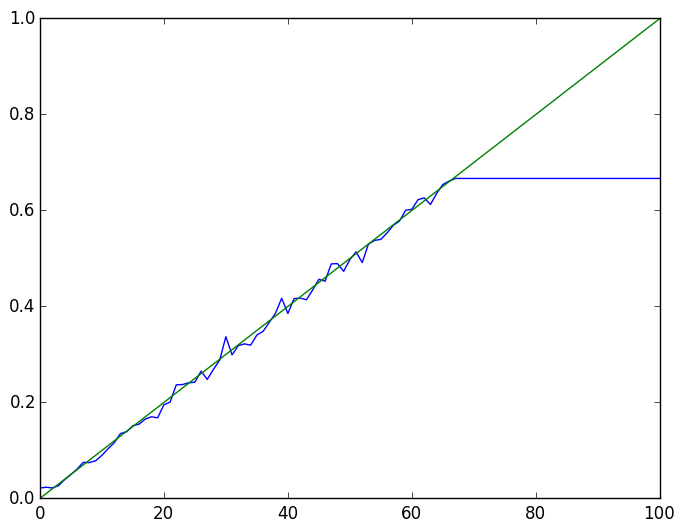

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32a906ed0>

In [242]:
N = 400
K = 10
C = 0.23
c1,c0 = watts_strogatz_clustering_limits(N,K)
c_est_range = 0:0.01:1

# beta_range = 0.0:0.05:1.0
c_range = similar(c_est_range)
for (i,c_est) in enumerate(c_est_range)
    g = watts_strogatz_with_custering(N,K,c_est)
    k = 2*ne(g)/nv(g)
    c = mean(local_clustering_coefficient(g))
    c_range[i] = c
end
plot(c_range)
plot(c_est_range)

In [226]:
N = 200
K = 20
beta = 0.5
beta_range = 0.0:0.05:1.0
c_range = similar(beta_range)
c_est_range = similar(beta_range)
for (i,beta) in enumerate(beta_range)
    g = watts_strogatz(N,K,beta)
    k = 2*ne(g)/nv(g)
    c = mean(local_clustering_coefficient(g))
    c_range[i] = c
    c_est_range[i] = watts_strogatz_get_clustering(N,K,beta)
end



println(c1 + (c0-c1)*(1-beta)^3)
println(c/c0," ",(1-beta)^3)

k: 20.0, c: 0.7105263157894735
k: 20.0, c: 0.6159456668389569
k: 20.0, c: 0.5279802941875732
k: 20.0, c: 0.45705747928878226
k: 20.0, c: 0.4078662809551017
k: 20.0, c: 0.34070112961887433
k: 20.0, c: 0.3059656285885186
k: 20.0, c: 0.25381462260662013
k: 20.0, c: 0.22340834788469727
k: 20.0, c: 0.18660548132538307
k: 20.0, c: 0.16600382387831802
k: 20.0, c: 0.14269360794079464
k: 20.0, c: 0.13163703582055314
k: 20.0, c: 0.1099035001387378
k: 20.0, c: 0.10448866201506726
k: 20.0, c: 0.10689790933826478
k: 20.0, c: 0.09578006362427549
k: 20.0, c: 0.09906857561482862
k: 20.0, c: 0.09751731196693937
k: 20.0, c: 0.095068063895486
k: 20.0, c: 0.0946844779689981
0.1
0.1332596356600714 0.0


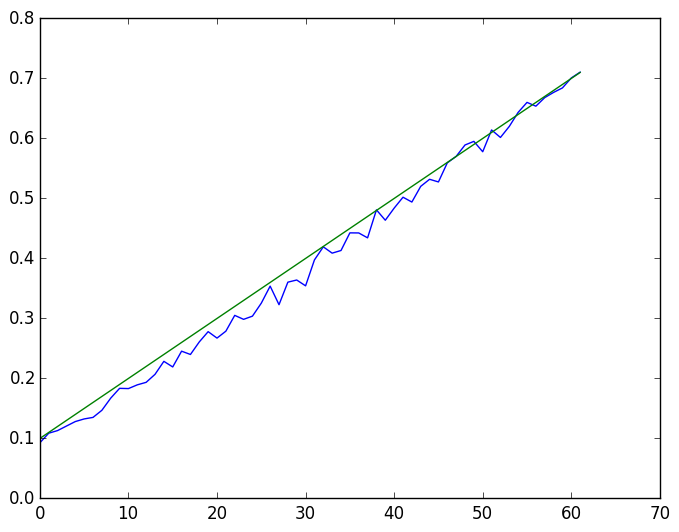

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x329395310>

In [223]:
plot(c_range)
plot(c_est_range)

In [29]:
mean(degree(g))

8.03

In [16]:
mean(Gamma(1.0,20))

20.0

In [35]:
# d = Normal(44,15)
# H = create_graph(4040,44,:fb)
# d = fit(Pareto,degree(H))
d = fit(Gamma,degree(H))
N = 4040
C = 0.6
G = random_clustering_graph(d,N,C) 

Degree_changed 55
Degree_changed 48
Degree_changed 45
Degree_changed 41
Degree_changed 36
Degree_changed 36
Degree_changed 35
Degree_changed 33
Degree_changed 33
Degree_changed 32
Degree_changed 29
Degree_changed 29
Degree_changed 27
Degree_changed 27
Degree_changed 27
Degree_changed 27
Degree_changed 26
Degree_changed 23
Degree_changed 22
Degree_changed 21
Degree_changed 20
Degree_changed 19
Degree_changed 19
Degree_changed 17
Degree_changed 17
Degree_changed 16
Degree_changed 16
Degree_changed 14
Degree_changed 14
Degree_changed 13
Degree_changed 3
Degree_changed 1
Degree_changed 100
Degree_changed 95
Degree_changed 86
Degree_changed 84
Degree_changed 84
Degree_changed 83
Degree_changed 81
Degree_changed 79
Degree_changed 79
Degree_changed 79
Degree_changed 76
Degree_changed 75
Degree_changed 74
Degree_changed 73
Degree_changed 72
Degree_changed 71
Degree_changed 69
Degree_changed 69
Degree_changed 67
Degree_changed 65
Degree_changed 63
Degree_changed 62
Degree_changed 61
Degree_chan

rm: temp_degree_sequence_2016-03-28T00:36:53.dat: No such file or directory


LoadError: LoadError: failed process: Process(`rm temp_degree_sequence_2016-03-28T00:36:53.dat`, ProcessExited(1)) [1]
while loading In[35], in expression starting on line 7

In [ ]:
1+1

In [4]:
H = create_graph(4040,44,:fb)

{4039, 88234} undirected graph

In [5]:
#mean(degree(G))
#std(degree(G))
println(mean(local_clustering_coefficient(G))," ", std(local_clustering_coefficient(G)))
println(mean(local_clustering_coefficient(H))," ", std(local_clustering_coefficient(H)))

0.4955951213367213 0.11235649891580025
0.6055467186200862 0.21446218755128868


In [ ]:
using PyPlot

d = Pareto(0.5)
d2 = Pareto(2)

x = 1:0.01:100

loglog(x,pdf(d,x))
loglog(x,pdf(d2,x))
grid()

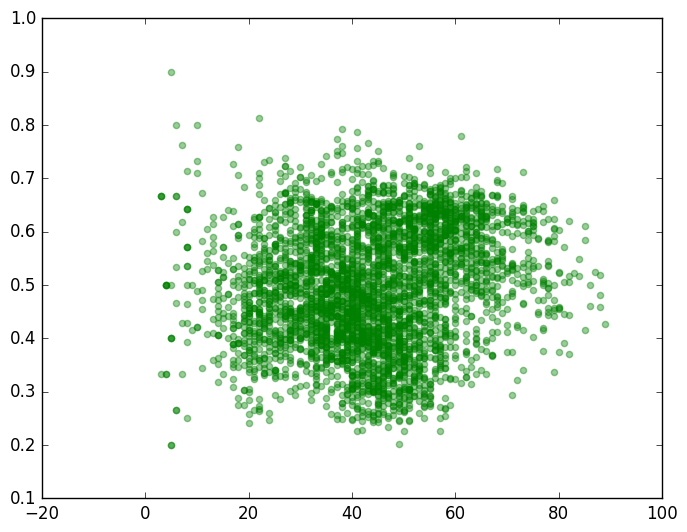

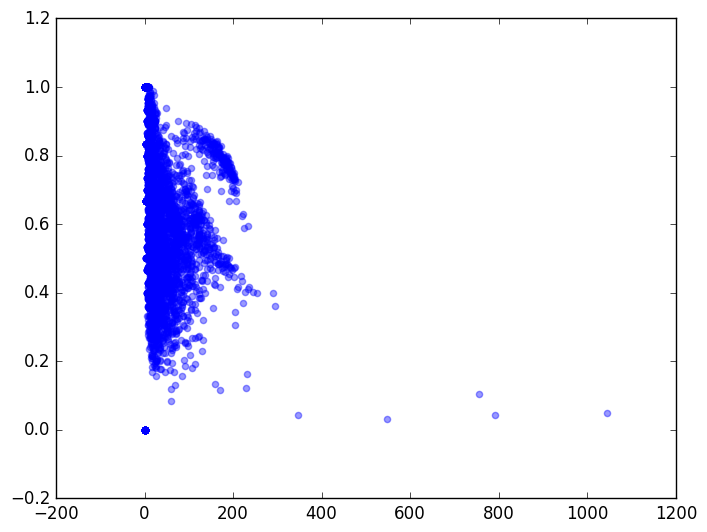

PyObject <matplotlib.collections.PathCollection object at 0x32671f250>

In [8]:
scatter(degree(G),local_clustering_coefficient(G),color="g",alpha=0.4)
figure()
scatter(degree(H),local_clustering_coefficient(H),color="b",alpha=0.4)

In [ ]:
plt[:hist](local_clustering_coefficient(G),bins=20,alpha=0.4,normed=true)
plt[:hist](local_clustering_coefficient(H),bins=20,alpha=0.4,normed=true)

In [34]:
d = fit(Pareto,dh)
d2 = fit(Gamma,dh)

Distributions.Gamma(α=0.9575757690034061, θ=45.626689856990765)

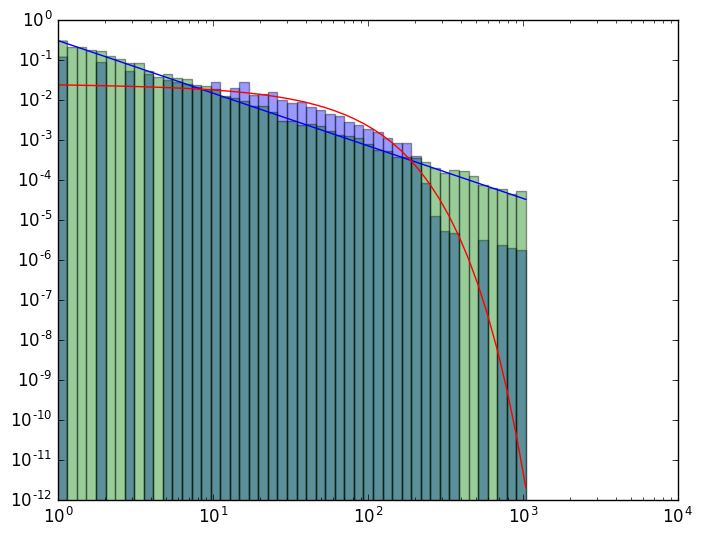

In [11]:
dh = degree(H)
dg = rand(d,length(dh))

binsh = logspace(log10(minimum(dh)),log10(maximum(dh)),50)


plt[:hist](dh,bins=binsh,alpha=0.4,normed=true,log=true)
plt[:hist](dg,bins=binsh,alpha=0.4,normed=true,log=true)
plot(binsh,pdf(d,binsh),"b")
plot(binsh,pdf(d2,binsh),"r")
gca()[:set_xscale]("log")

#xlim([0,250])

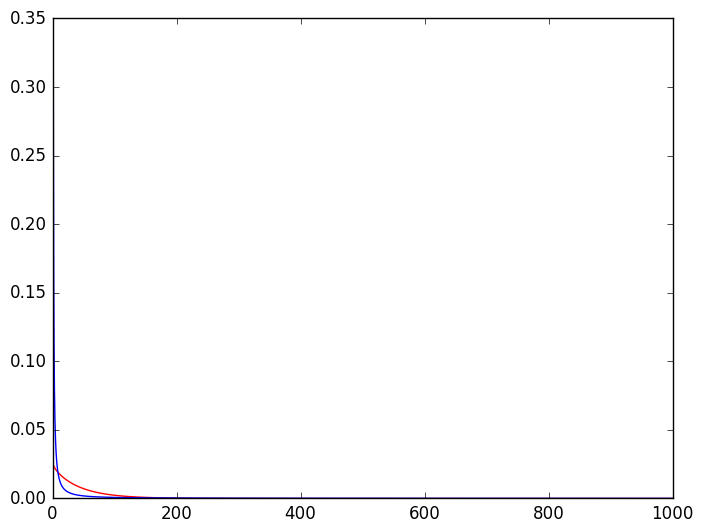

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32a1e0dd0>

In [41]:
x = 0:0.1:1000
plot(x,pdf(d2,x),"r")
plot(x,pdf(d,x),"b")

In [32]:
params(d2)
d3 = Gamma(1.0,mean(degree(H))/0.5)
mean(d3)

87.38202525377568

In [36]:

d = fit(Pareto,dh)
params(d)
#now keep the shape the same and change the scale
#compute the new mean by cutting off the distribution at high x (at N-1)
#dnew = Pareto(params(d))

(0.31533381687538337,1.0)

4039-element Array{Int64,1}:
 347
  17
  10
  17
  10
  13
   6
  20
   8
  57
  10
   1
   1
   ⋮
   7
   2
   2
  19
  11
   2
   3
   2
   1
   2
   4
   9